In [1]:
import pandas as pd
import numpy as np
import pandas as pandas_pd
import os
import time
import sys

In [2]:
data = pd.read_csv('test_data.csv')

In [3]:
data.head()

,title,url,abstract
0,Wikibooks: Radiation Oncology/NHL/CLL-SLL,https://en.wikibooks.org/wiki/Radiation_Oncolo,Chronic Lymphocytic Leukemia and Small Lymphoc...
1,Wikibooks: Romanian/Lesson 9,https://en.wikibooks.org/wiki/Romanian/Lesson_9,==Băuturi/Beverages==
2,Wikibooks: Karrigell,https://en.wikibooks.org/wiki/Karrigell,Karrigell is an open Source Python web framewo...
3,Wikibooks: Calculus/Precalculus,https://en.wikibooks.org/wiki/The_Pyrogenesis,====setupUnitPanel====


In [4]:
os.path.getsize('test_data.csv')

507

In [5]:
#Read with Pandas
import pandas as pd
start = time.time()
df = pd.read_csv('test_data.csv')
end = time.time()
result = print("Read csv with pandas: ",(end-start),"sec")

Read csv with pandas:  0.0015058517456054688 sec


In [6]:

#Read with Dask
from dask import dataframe as dd
start = time.time()
dask_df = dd.read_csv('test_data.csv')
end = time.time()
result = print("Read csv with dask: ",(end-start),"sec")

Read csv with dask:  0.03756427764892578 sec


C:\Users\Admin\AppData\Local\Temp\ipykernel_37088\932894012.py:2: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use a new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedback can be reported on the Dask issue tracker
https://github.com/dask/dask/issues 

To disable this warning in the future, set dask config:

    # via Python
    >>> dask.config.set({'dataframe.query-planning-warning': False})

    # via CLI
    dask co

In [7]:
# Read with Modin Ray
import modin.pandas as pd
import ray
ray.shutdown()
ray.init()
start = time.time()
df = pd.read_csv('test_data.csv')
end = time.time()
result = print("Read csv with modin ray: ",(end-start),"sec")

2024-03-09 22:27:39,273	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Read csv with modin ray:  1.1493663787841797 sec


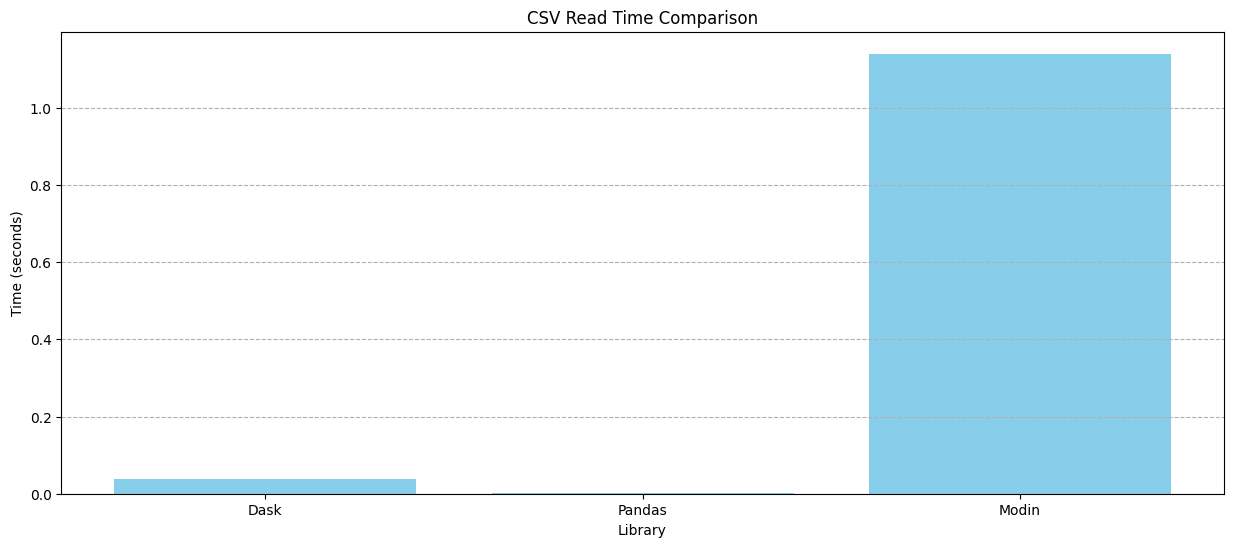

In [18]:
import matplotlib.pyplot as plt


libraries = ['Dask', 'Pandas', 'Modin']
read_csv_time = [0.037, 0.0015, 1.14] 

# Create a bar chart
plt.figure(figsize=(15, 6))
plt.bar(libraries, read_csv_time, color='skyblue')
plt.title('CSV Read Time Comparison')
plt.xlabel('Library')
plt.ylabel('Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()



In [19]:
len(data.index)

4

In [20]:
len(data.columns)

3

In [26]:
# remove special character
data.columns=data.columns.str.replace('[#,@,&]','')

In [21]:
import yaml
import logging
import os
import subprocess
import yaml
import pandas as pd
import datetime 
import gc
import re

In [42]:
%%writefile testutility.py
import logging
import os
import subprocess
import yaml
import pandas as pd
import datetime 
import gc
import re


################
# File Reading #
################

def read_config_file(filepath):
    with open(filepath, 'r') as stream:
        try:
            return yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            logging.error(exc)


def replacer(string, char):
    pattern = char + '{2,}'
    string = re.sub(pattern, char, string) 
    return string

def col_header_val(df,table_config):
    '''
    replace whitespaces in the column
    and standardized column names
    '''
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace('[^\w]','_',regex=True)
    df.columns = list(map(lambda x: x.strip('_'), list(df.columns)))
    df.columns = list(map(lambda x: replacer(x,'_'), list(df.columns)))
    expected_col = list(map(lambda x: x.lower(),  table_config['columns']))
    expected_col.sort()
    df.columns =list(map(lambda x: x.lower(), list(df.columns)))
    df = df.reindex(sorted(df.columns), axis=1)
    if len(df.columns) == len(expected_col) and list(expected_col)  == list(df.columns):
        print("column name and column length validation passed")
        return 1
    else:
        print("column name and column length validation failed")
        mismatched_columns_file = list(set(df.columns).difference(expected_col))
        print("Following File columns are not in the YAML file",mismatched_columns_file)
        missing_YAML_file = list(set(expected_col).difference(df.columns))
        print("Following YAML columns are not in the file uploaded",missing_YAML_file)
        logging.info(f'df columns: {df.columns}')
        logging.info(f'expected columns: {expected_col}')
        return 0


Writing testutility.py


In [23]:
%%writefile file.yaml
file_type: csv
dataset_name: en-books-dataset
file_name: test_data
table_name: edsurv
inbound_delimiter: ","
outbound_delimiter: "|"
skip_leading_rows: 1
columns: 
    - title
    - url
    - abstract

Writing file.yaml


In [4]:
# Read config file
import testutility as util
config_data = util.read_config_file("file.yaml")

In [5]:
config_data

{'file_type': 'csv',
 'dataset_name': 'en-books-dataset',
 'file_name': 'test_data',
 'table_name': 'edsurv',
 'inbound_delimiter': ',',
 'outbound_delimiter': '|',
 'skip_leading_rows': 1,
 'columns': ['title', 'url', 'abstract']}

In [6]:
config_data['file_type']

'csv'

In [7]:
config_data['inbound_delimiter']

','

In [10]:
# Normal reading process of the file
import pandas as pd
df = pd.read_csv("test_data.csv",delimiter=',')
df.head()

,title,url,abstract
0,Wikibooks: Radiation Oncology/NHL/CLL-SLL,https://en.wikibooks.org/wiki/Radiation_Oncolo,Chronic Lymphocytic Leukemia and Small Lymphoc...
1,Wikibooks: Romanian/Lesson 9,https://en.wikibooks.org/wiki/Romanian/Lesson_9,==Băuturi/Beverages==
2,Wikibooks: Karrigell,https://en.wikibooks.org/wiki/Karrigell,Karrigell is an open Source Python web framewo...
3,Wikibooks: Calculus/Precalculus,https://en.wikibooks.org/wiki/The_Pyrogenesis,====setupUnitPanel====


In [12]:
# read the file using config file
file_type = config_data['file_type']
source_file = "./" + config_data['file_name'] + f'.{file_type}'
#print("",source_file)
df = pd.read_csv(source_file,delimiter=config_data['inbound_delimiter'])
df.head()

,title,url,abstract
0,Wikibooks: Radiation Oncology/NHL/CLL-SLL,https://en.wikibooks.org/wiki/Radiation_Oncolo,Chronic Lymphocytic Leukemia and Small Lymphoc...
1,Wikibooks: Romanian/Lesson 9,https://en.wikibooks.org/wiki/Romanian/Lesson_9,==Băuturi/Beverages==
2,Wikibooks: Karrigell,https://en.wikibooks.org/wiki/Karrigell,Karrigell is an open Source Python web framewo...
3,Wikibooks: Calculus/Precalculus,https://en.wikibooks.org/wiki/The_Pyrogenesis,====setupUnitPanel====


In [13]:
# validate the header of the file
util.col_header_val(df,config_data)

column name and column length validation passed


1

In [14]:
print("columns of files are:" ,df.columns)
print("columns of YAML are:" ,config_data['columns'])

columns of files are: Index(['title', 'url', 'abstract'], dtype='object')
columns of YAML are: ['title', 'url', 'abstract']


In [15]:
if util.col_header_val(df,config_data)==0:
    print("validation failed")
    # write code to reject the file
else:
    print("col validation passed")
    # write the code to perform further action
    # in the pipeline

column name and column length validation passed
col validation passed


In [16]:
pd.read_csv("test_data.csv")

,title,url,abstract
0,Wikibooks: Radiation Oncology/NHL/CLL-SLL,https://en.wikibooks.org/wiki/Radiation_Oncolo,Chronic Lymphocytic Leukemia and Small Lymphoc...
1,Wikibooks: Romanian/Lesson 9,https://en.wikibooks.org/wiki/Romanian/Lesson_9,==Băuturi/Beverages==
2,Wikibooks: Karrigell,https://en.wikibooks.org/wiki/Karrigell,Karrigell is an open Source Python web framewo...
3,Wikibooks: Calculus/Precalculus,https://en.wikibooks.org/wiki/The_Pyrogenesis,====setupUnitPanel====


In [17]:
df['url'][0:4]

0     https://en.wikibooks.org/wiki/Radiation_Oncolo
1    https://en.wikibooks.org/wiki/Romanian/Lesson_9
2            https://en.wikibooks.org/wiki/Karrigell
3      https://en.wikibooks.org/wiki/The_Pyrogenesis
Name: url, dtype: object

In [18]:
df['abstract'][2]

'Karrigell is an open Source Python web framework written in Python'

In [19]:
### Creating test file for this demo:
testdata = {
    'title' : ['Wikibooks: Radiation Oncology/NHL/CLL-SLL', 'Wikibooks: Romanian/Lesson 9', 'Wikibooks: Karrigell','Wikibooks: Calculus/Precalculus'],
    'url' : ['https://en.wikibooks.org/wiki/Radiation_Oncolo', 'https://en.wikibooks.org/wiki/Romanian/Lesson_9', 'https://en.wikibooks.org/wiki/Karrigell','https://en.wikibooks.org/wiki/The_Pyrogenesis'],
    'abstract' : ['Chronic Lymphocytic Leukemia and Small Lymphocytic Lymphoma (CLL/SLL)','==Băuturi/Beverages==','Karrigell is an open Source Python web framework written in Python','====setupUnitPanel====']
}
import pandas as pd
df = pd.DataFrame(testdata, columns=['title', 'url','abstract'])
df.to_csv("./test_data.csv",index=False)

In [20]:
df

,title,url,abstract
0,Wikibooks: Radiation Oncology/NHL/CLL-SLL,https://en.wikibooks.org/wiki/Radiation_Oncolo,Chronic Lymphocytic Leukemia and Small Lymphoc...
1,Wikibooks: Romanian/Lesson 9,https://en.wikibooks.org/wiki/Romanian/Lesson_9,==Băuturi/Beverages==
2,Wikibooks: Karrigell,https://en.wikibooks.org/wiki/Karrigell,Karrigell is an open Source Python web framewo...
3,Wikibooks: Calculus/Precalculus,https://en.wikibooks.org/wiki/The_Pyrogenesis,====setupUnitPanel====


In [21]:
testdata

{'title': ['Wikibooks: Radiation Oncology/NHL/CLL-SLL',
  'Wikibooks: Romanian/Lesson 9',
  'Wikibooks: Karrigell',
  'Wikibooks: Calculus/Precalculus'],
 'url': ['https://en.wikibooks.org/wiki/Radiation_Oncolo',
  'https://en.wikibooks.org/wiki/Romanian/Lesson_9',
  'https://en.wikibooks.org/wiki/Karrigell',
  'https://en.wikibooks.org/wiki/The_Pyrogenesis'],
 'abstract': ['Chronic Lymphocytic Leukemia and Small Lymphocytic Lymphoma (CLL/SLL)',
  '==Băuturi/Beverages==',
  'Karrigell is an open Source Python web framework written in Python',
  '====setupUnitPanel====']}

In [24]:
import os
# Get file summary
file_size = os.path.getsize('test_data.csv')
num_rows = len(df)
num_cols = len(df.columns)

# Print file summary
print("File summary:")
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print(f"File size: {file_size} bytes")
     

File summary:
Number of rows: 4
Number of columns: 3
File size: 512 bytes
